In [ ]:
!pip install laspy[laszip]
!pip install laspy matplotlib
# !pip install tensorflow-graphics
# %pip install PyPotree

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.




- Gather pointcloud data 
- Import pointcloud data to databricks instance
- Design Basic Network Archtecture
- Design Quantizer

## Connect to Azure Storage

In [ ]:
container_name = "preliminary_tests"
storage_account_name = "pointclouds"
mount_name = "mount1"
sas_token = "xxxxxxxxxxxxxxxxxx"

In [ ]:
try:
    dbutils.fs.mount(
        source = f"wasbs://{container_name}@{storage_account_name}.blob.core.windows.net/",
        mount_point = f"/mnt/{mount_name}",
        extra_configs = {f"fs.azure.sas.{container_name}.{storage_account_name}.blob.core.windows.net": sas_token})
except Exception as e:
    print(f"An error occurred: {e}")


An error occurred: An error occurred while calling o403.mount.
: java.rmi.RemoteException: java.lang.IllegalArgumentException: requirement failed: Directory already mounted: /mnt/testmount; nested exception is: 
	java.lang.IllegalArgumentException: requirement failed: Directory already mounted: /mnt/testmount
	at com.databricks.backend.daemon.data.client.DbfsClient.send0(DbfsClient.scala:135)
	at com.databricks.backend.daemon.data.client.DbfsClient.sendIdempotent(DbfsClient.scala:69)
	at com.databricks.backend.daemon.dbutils.DBUtilsCore.createOrUpdateMount(DBUtilsCore.scala:1077)
	at com.databricks.backend.daemon.dbutils.DBUtilsCore.$anonfun$mount$1(DBUtilsCore.scala:1103)
	at com.databricks.logging.UsageLogging.$anonfun$recordOperation$1(UsageLogging.scala:573)
	at com.databricks.logging.UsageLogging.executeThunkAndCaptureResultTags$1(UsageLogging.scala:668)
	at com.databricks.logging.UsageLogging.$anonfun$recordOperationWithResultTags$4(UsageLogging.scala:686)
	at com.databricks.logg

In [ ]:
# Test to import CSV
file_name = "Scoring"
df = spark.read.format("csv").option("header", "true").load(f"/mnt/{mount_name}/{file_name}.csv")
display(df)

playerID year stint tmID lgID pos GP G A Pts PIM +/- PPG PPA SHG SHA GWG GTG SOG PostGP PostG PostA PostPts PostPIM Post+/- PostPPG PostPPA PostSHG PostSHA PostGWG PostSOG aaltoan01 1997 1 ANA NHL C 3 0 0 0 0 -1 0 0 0 0 0 0 1 null null null null null null null null null null null null aaltoan01 1998 1 ANA NHL C 73 3 5 8 24 -12 2 1 0 0 0 0 61 4 0 0 0 2 0 0 0 0 0 0 0 aaltoan01 1999 1 ANA NHL C 63 7 11 18 26 -13 1 0 0 0 1 0 102 null null null null null null null null null null null null aaltoan01 2000 1 ANA NHL C 12 1 1 2 2 1 0 0 0 0 0 0 18 null null null null null null null null null null null null abbeybr01 1975 1 CIN WHA D 17 1 0 1 12 -3 0 null 0 null 0 null 2 null null null null null null null null null null null null abbotge01 1943 1 BOS NHL G 1 0 0 0 0 null null null null null null null null null null null null null null null null null null null null abbotre01 1952 1 MTL NHL C 3 0 0 0 0 null null null null null null null null null null null null null null null null null null null null abdelju01 2007 1 DET NHL L 2 0 0 0 2 0 0 0 0 0 0 null 6 null null null null null null null null null null null null abdelju01 2008 1 DET NHL L 2 0 0 0 0 0 0 0 0 0 0 null 2 10 2 1 3 0 2 0 0 0 0 0 11 abdelju01 2009 1 DET NHL L 50 3 3 6 35 -11 0 0 0 0 0 null 79 11 1 1 2 36 1 0 0 0 0 0 12 abdelju01 2010 1 DET NHL L 74 7 12 19 61 15 0 0 0 1 1 null 129 11 0 0 0 22 -4 0 0 0 0 0 17 abdelju01 2011 1 DET NHL L 81 8 14 22 62 4 0 0 0 0 1 null 121 5 0 0 0 2 -5 0 0 0 0 0 7 abelcl01 1926 1 NYR NHL D 44 8 4 12 78 null null null null null null null null 2 0 1 1 8 null null null null null null null abelcl01 1927 1 NYR NHL D 23 0 1 1 28 null null null null null null null null 9 1 0 1 14 null null null null null null null abelcl01 1928 1 NYR NHL D 44 3 1 4 41 null null null null null null null null 6 0 0 0 8 null null null null null null null abelcl01 1929 1 CHI NHL D 38 3 3 6 42 null null null null null null null null 2 0 0 0 10 null null null null null null null abelcl01 1930 1 CHI NHL D 43 0 1 1 45 null null null null null null null null 9 0 0 0 8 null null null null null null null abelcl01 1931 1 CHI NHL D 48 4 3 7 34 null null null null null null null null 2 0 0 0 2 null null null null null null null abelcl01 1932 1 CHI NHL D 47 0 4 4 63 null null null null null null null null null null null null null null null null null null null null abelcl01 1933 1 CHI NHL D 46 2 1 3 28 null null null null null null null null 8 0 0 0 8 null null null null null null null abelge01 1966 1 DET NHL C 1 0 0 0 0 null 0 null 0 null 0 0 null null null null null null null null null null null null null abelsi01 1938 1 DET NHL L 15 1 1 2 0 null null null null null null null null 6 1 1 2 2 null null null null null null null abelsi01 1939 1 DET NHL L 24 1 5 6 4 null null null null null null null null 5 0 3 3 21 null null null null null null null abelsi01 1940 1 DET NHL C 47 11 22 33 29 null null null null null null null null 9 2 2 4 2 null null null null null null null abelsi01 1941 1 DET NHL C 48 18 31 49 45 null null null null null null null null 12 4 2 6 8 null null null null null null null abelsi01 1942 1 DET NHL L 49 18 24 42 33 null null null null null null null null 10 5 8 13 4 null null null null null null null abelsi01 1945 1 DET NHL C 7 0 2 2 0 null null null null null null null null 3 0 0 0 0 null null null null null null null abelsi01 1946 1 DET NHL C 60 19 29 48 29 null null null null null null null null 3 1 1 2 2 null null null null null null null abelsi01 1947 1 DET NHL C 60 14 30 44 69 null null null null null null null null 10 0 3 3 16 null null null null null null null abelsi01 1948 1 DET NHL C 60 28 26 54 49 null null null null null null null null 11 3 3 6 6 null null null null null null null abelsi01 1949 1 DET NHL C 69 34 35 69 46 null null null null null null null null 14 6 2 8 6 null null null null null null null abelsi01 1950 1 DET NHL C 69 23 38 61 30 null null null null null null null null 6 4 3 7 0 null null null null null null null abelsi01 1951 1 DET NHL C 


## Visaulize Pointcloud

In [ ]:
%fs ls /mnt/testmount

path name size modificationTime dbfs:/mnt/testmount/2013_05_28_drive_0000_sync/ 2013_05_28_drive_0000_sync/ 0 0 dbfs:/mnt/testmount/2d_point_test.csv 2d_point_test.csv 31980111 1700155917000 dbfs:/mnt/testmount/2d_point_train.csv 2d_point_train.csv 191794866 1700155917000 dbfs:/mnt/testmount/Point_Cloud_USGS_LPC_IL_4County_Cook_2017_LAS_2019.laz Point_Cloud_USGS_LPC_IL_4County_Cook_2017_LAS_2019.laz 61798289 1699819033000 dbfs:/mnt/testmount/Scoring.csv Scoring.csv 3272280 1699810722000 dbfs:/mnt/testmount/map_pointcloud.laz map_pointcloud.laz 5011901 1699814418000 dbfs:/mnt/testmount/test.csv test.csv 31980111 1700156487000 dbfs:/mnt/testmount/train.csv train.csv 191794866 1700156732000

In [ ]:
import laspy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Random terrain pointcloud
# file_name = "map_pointcloud.laz"

# Pointcloud shapes (eg, chair, table)
# https://3dvision.princeton.edu/projects/2014/3DShapeNets/

# Downtown chicago pointcloud
# Quality level QL1 https://www.usgs.gov/3d-elevation-program/topographic-data-quality-levels-qls
# Retrived from https://maps.equatorstudios.com/
file_name = "Point_Cloud_USGS_LPC_IL_4County_Cook_2017_LAS_2019.laz" 

las = laspy.read(f"/dbfs/mnt/{mount_name}/{file_name}")

In [ ]:
num_chunks = 6                          # Number of chunks              6   good example    2
chunk_index_x, chunk_index_y  = 2, 2    # Select chunk to visualize     2,2 good example    1, 1

def divide_into_chunks(las, num_chunks):
    x_min, x_max = las.x.min(), las.x.max()
    y_min, y_max = las.y.min(), las.y.max()

    x_chunk_size = (x_max - x_min) / num_chunks
    y_chunk_size = (y_max - y_min) / num_chunks

    return x_min, x_chunk_size, y_min, y_chunk_size

def get_chunk(las, x_min, x_chunk_size, y_min, y_chunk_size, chunk_index_x, chunk_index_y):
    x_start = x_min + chunk_index_x * x_chunk_size
    x_end = x_start + x_chunk_size

    y_start = y_min + chunk_index_y * y_chunk_size
    y_end = y_start + y_chunk_size

    mask = (las.x >= x_start) & (las.x < x_end) & \
           (las.y >= y_start) & (las.y < y_end)

    return np.vstack((las.x[mask], las.y[mask], las.z[mask], las.intensity[mask], las.classification[mask])).transpose()

x_min, x_chunk_size, y_min, y_chunk_size = divide_into_chunks(las, num_chunks) 
selected_chunk = get_chunk(las, x_min, x_chunk_size, y_min, y_chunk_size, chunk_index_x, chunk_index_y)

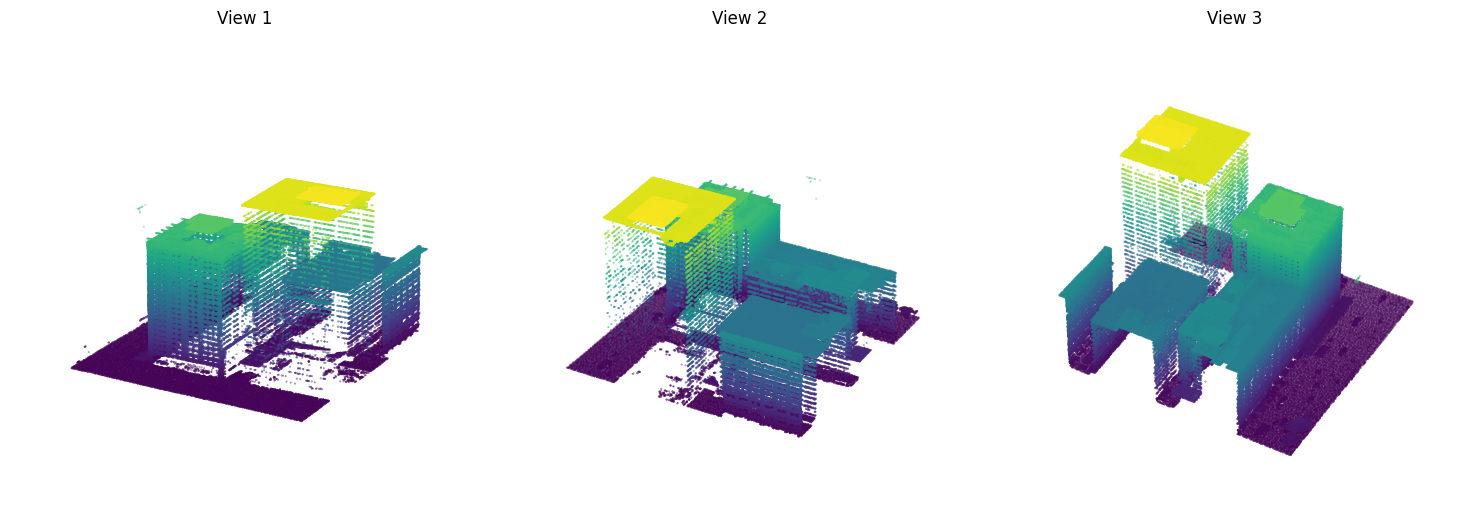

In [ ]:
fig = plt.figure(figsize=(15, 5))

# Define the views for each subplot
views = [(20, 30), (30, 120), (40, 210)] #(elevation, azimuth)
titles = ['View 1', 'View 2', 'View 3']

for i in range(3):
    ax = fig.add_subplot(1, 3, i + 1, projection='3d')
    ax.scatter(selected_chunk[:, 0], selected_chunk[:, 1], selected_chunk[:, 2], c=selected_chunk[:, 2], cmap='viridis', marker='o',s=0.1)
    ax.view_init(elev=views[i][0], azim=views[i][1])
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_axis_off()
    ax.set_title(titles[i])

plt.tight_layout()
plt.show()

#### 3D Tensorboard view

In [ ]:
import tensorflow as tf
from tensorboard.plugins.mesh import summary_v2 as mesh_summary
view_1 = selected_chunk[:,:3].copy()

# Assuming view_1 is your point cloud data
point_cloud = tf.convert_to_tensor(view_1.reshape(1, view_1.shape[0], 3))

writer = tf.summary.create_file_writer(experiment_log_dir)

with writer.as_default():
    # Log the point cloud using the mesh plugin
    mesh_summary.mesh('point_cloud', vertices=point_cloud, step=0)

# Flush the writer
writer.flush()


In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
%reload_ext tensorboard

In [ ]:
experiment_log_dir = '/dbfs/logs/pointcloud_view_1'  #'/dbfs/logs/pointcloud_view'
%tensorboard --logdir $experiment_log_dir

Tensorboard may not be displayed in the notebook cell output when 'Third-party iFraming prevention' is disabled. You can still use Tensorboard by clicking the link below to open Tensorboard in a new tab. To enable Tensorboard in notebook cell output, please ask your workspace admin to enable 'Third-party iFraming prevention'.


Reusing TensorBoard on port 6008 (pid 7508), started 0:02:41 ago. (Use '!kill 7508' to kill it.)

Open in a new tab
 
 Note: TensorBoard is only available when this notebook remains attached to the cluster. 
 
 
 Note: This cell needs to be re-run for TensorBoard to be available if this notebook is imported into a different workspace.

### Loss Function

In [ ]:
import time
import tensorflow as tf
# Stanford CS 468 Machine Learning Course
# https://graphics.stanford.edu/courses/cs468-20-fall/schedule.html
# https://graphics.stanford.edu/courses/cs468-17-spring/LectureSlides/L14%20-%203d%20deep%20learning%20on%20point%20cloud%20representation%20%28analysis%29.pdf


view_1 = selected_chunk[:,:3].copy()
v1_tensor = tf.convert_to_tensor(view_1.reshape(1, -1, 3), dtype=tf.float32)


def chamfer_distance(set1, set2):
    # Compute pairwise distances
    s1_expand = tf.expand_dims(set1, axis=2)
    s2_expand = tf.expand_dims(set2, axis=1)
    distances = tf.reduce_sum(tf.square(s1_expand - s2_expand), axis=-1)

    # Compute minimum distances
    min_dist_1_to_2 = tf.reduce_min(distances, axis=2)
    min_dist_2_to_1 = tf.reduce_min(distances, axis=1)

    # Average minimum distances
    chamfer_dist = tf.reduce_mean(min_dist_1_to_2, axis=1) + tf.reduce_mean(min_dist_2_to_1, axis=1)
    return chamfer_dist

def batched_chamfer_distance(set1, set2, batch_size):
    num_points = set1.shape[1]
    total_dist = 0
    for i in range(0, num_points, batch_size):
        batch_set1 = set1[:, i:i+batch_size, :]
        batch_set2 = set2[:, i:i+batch_size, :]
        total_dist += chamfer_distance(batch_set1, batch_set2)

    return total_dist / tf.cast(tf.math.ceil(num_points / batch_size), tf.float32)

averages = 5
# batch_sizes = [512, 1024, 2048, 4096]
batch_sizes = [50000]
for batch in batch_sizes:
    total_loss = 0
    total_time = 0

    for seed in range(averages):
        np.random.seed(seed)
        view_2 = view_1.copy()
        np.random.shuffle(view_2)
        v2_tensor = tf.convert_to_tensor(view_2.reshape(1, -1, 3), dtype=tf.float32)

        start_time = time.time()
        loss = batched_chamfer_distance(v1_tensor, v2_tensor, batch)
        end_time = time.time()

        total_loss += loss
        total_time += end_time - start_time

    average_loss = total_loss / averages
    average_time = total_time / averages
    print(f"batch_size: {batch} | average loss: {average_loss.numpy()[0]:.1f} | average time: {average_time:.1f} seconds")

# batch_size: 512  | average loss: 22420 | average time: 2.4098 seconds
# batch_size: 1024 | average loss: 18252 | average time: 3.0022 seconds
# batch_size: 2048 | average loss: 15251 | average time: 7.9143 seconds
# batch_size: 4096 | average loss: 13819 | average time: 15.6773 seconds
# batch_size: 10000 | average loss: 10666.0 | average time: 35.8 seconds
# batch_size: 20000 | average loss: 6298.5 | average time: 117.7 seconds



---------------------------------------------------------------------------
ResourceExhaustedError                    Traceback (most recent call last)
File <command-2151692533875401>, line 50
     47 v2_tensor = tf.convert_to_tensor(view_2.reshape(1, -1, 3), dtype=tf.float32)
     49 start_time = time.time()
---> 50 loss = batched_chamfer_distance(v1_tensor, v2_tensor, batch)
     51 end_time = time.time()
     53 total_loss += loss

File <command-2151692533875401>, line 32, in batched_chamfer_distance(set1, set2, batch_size)
     30     batch_set1 = set1[:, i:i+batch_size, :]
     31     batch_set2 = set2[:, i:i+batch_size, :]
---> 32     total_dist += chamfer_distance(batch_set1, batch_set2)
     34 return total_dist / tf.cast(tf.math.ceil(num_points / batch_size), tf.float32)

File <command-2151692533875401>, line 16, in chamfer_distance(set1, set2)
     14 s1_expand = tf.expand_dims(set1, axis=2)
     15 s2_expand = tf.expand_dims(set2, axis=1)
---> 16 distances = tf.reduce_sum(tf

In [ ]:
from tensorflow_graphics.util import export_api
from tensorflow_graphics.util import shape
from tensorflow_graphics.util import type_alias

def evaluate(point_set_a: type_alias.TensorLike,
             point_set_b: type_alias.TensorLike,
             name: str = "chamfer_distance_evaluate") -> tf.Tensor:
  with tf.name_scope(name):
    point_set_a = tf.convert_to_tensor(value=point_set_a)
    point_set_b = tf.convert_to_tensor(value=point_set_b)

    shape.compare_batch_dimensions(
        tensors=(point_set_a, point_set_b),
        tensor_names=("point_set_a", "point_set_b"),
        last_axes=-3,
        broadcast_compatible=True)
    # Verify that the last axis of the tensors has the same dimension.
    dimension = point_set_a.shape.as_list()[-1]
    shape.check_static(
        tensor=point_set_b,
        tensor_name="point_set_b",
        has_dim_equals=(-1, dimension))

    # Create N x M matrix where the entry i,j corresponds to ai - bj (vector of
    # dimension D).
    difference = (
        tf.expand_dims(point_set_a, axis=-2) -
        tf.expand_dims(point_set_b, axis=-3))
    # Calculate the square distances between each two points: |ai - bj|^2.
    square_distances = tf.einsum("...i,...i->...", difference, difference)

    minimum_square_distance_a_to_b = tf.reduce_min(
        input_tensor=square_distances, axis=-1)
    minimum_square_distance_b_to_a = tf.reduce_min(
        input_tensor=square_distances, axis=-2)

    return (
        tf.reduce_mean(input_tensor=minimum_square_distance_a_to_b, axis=-1) +
        tf.reduce_mean(input_tensor=minimum_square_distance_b_to_a, axis=-1))


# Test with different batch sizes
averages = 5
# batch_sizes = [512, 1024, 2048, 4096]

for batch in batch_sizes:
    total_loss = 0
    total_time = 0

    for seed in range(averages):
        np.random.seed(seed)
        view_2 = view_1.copy()
        np.random.shuffle(view_2)
        v2_tensor = tf.convert_to_tensor(view_2.reshape(1, -1, 3), dtype=tf.float32)

        start_time = time.time()
        num_points = v1_tensor.shape[1]
        loss_accumulated = 0

        # Simple batching mechanism
        for i in range(0, num_points, batch):
            batch_set1 = v1_tensor[:, i:i+batch, :]
            batch_set2 = v2_tensor[:, i:i+batch, :]
            loss_accumulated += evaluate(batch_set1, batch_set2)

        loss = loss_accumulated / tf.cast(tf.math.ceil(num_points / batch), tf.float32)
        end_time = time.time()

        total_loss += loss
        total_time += end_time - start_time

    average_loss = total_loss / averages
    average_time = total_time / averages
    print(f"batch_size: {batch} | average loss: {average_loss.numpy()[0]:.4f} | average time: {average_time:.4f} seconds")

# batch_size: 512 | average loss: 22420.2461 | average time: 4.3681 seconds
# batch_size: 1024 | average loss: 18252.9941 | average time: 6.6982 seconds
# batch_size: 2048 | average loss: 15251.0410 | average time: 13.5026 seconds
# batch_size: 4096 | average loss: 13819.3438 | average time: 26.7927 seconds

---------------------------------------------------------------------------
ResourceExhaustedError                    Traceback (most recent call last)
File <command-2151692533875421>, line 64
     62     batch_set1 = v1_tensor[:, i:i+batch, :]
     63     batch_set2 = v2_tensor[:, i:i+batch, :]
---> 64     loss_accumulated += evaluate(batch_set1, batch_set2)
     66 loss = loss_accumulated / tf.cast(tf.math.ceil(num_points / batch), tf.float32)
     67 end_time = time.time()

File <command-2151692533875421>, line 27, in evaluate(point_set_a, point_set_b, name)
     19 shape.check_static(
     20     tensor=point_set_b,
     21     tensor_name="point_set_b",
     22     has_dim_equals=(-1, dimension))
     24 # Create N x M matrix where the entry i,j corresponds to ai - bj (vector of
     25 # dimension D).
     26 difference = (
---> 27     tf.expand_dims(point_set_a, axis=-2) -
     28     tf.expand_dims(point_set_b, axis=-3))
     29 # Calculate the square distances between each two

## R^1 Data Non-Linear Transform Coder

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# https://www.tensorflow.org/guide/basic_training_loops
class NonLinearCompressor:
    def __init__(self, N, activation_function='tanh'):
        B_map = {'sigmoid': (0,1), 'tanh': (-1,1)}
        self._lowerbound = B_map[activation_function][0]
        self._upperbound = B_map[activation_function][1]
        self._N = N
        self._delta = (self._upperbound -self._lowerbound) / N
        self.optimizer = optimizers.Adam()

        self.forward_transform = models.Sequential([
            layers.Dense(16, activation='relu', input_shape=(1,)),
            layers.Dense(16, activation='relu'),
            layers.Dense(1, activation=activation_function)
        ])

        self.inverse_transform = models.Sequential([
            layers.Dense(16, activation='relu', input_shape=(1,)),
            layers.Dense(16, activation='relu'),
            layers.Dense(1)
        ])

    def continuous_quantizer(self, x):
        noise = tf.random.uniform(tf.shape(x), minval=-self._delta/2, maxval=self._delta/2,)
        return x + noise 
    
    def discrete_quantizer(self, data):
        data_range = self._upperbound - self._lowerbound
        bin_size = data_range / self._N
        bins = np.arange(start=self._lowerbound, stop=self._upperbound + bin_size, step=bin_size)
        bin_idxs = np.digitize(data, bins,right=True)

        centroids =  np.arange(start=self._lowerbound + (bin_size / 2) , stop=self._upperbound, step=bin_size)

        return np.array([centroids[idx-1] for idx in bin_idxs])
    
    # In the future must add lossless encoder and incorperate code rate into loss function

    def training_model(self, x):
        x_transformed = self.forward_transform(x)
        x_quantized = self.continuous_quantizer(x_transformed)
        x_hat = self.inverse_transform(x_quantized)
        return x_hat

    def evaluation_model(self, x):
        x_transformed = self.forward_transform(x)
        x_quantized = self.discrete_quantizer(x_transformed)
        x_hat = self.inverse_transform(x_quantized)
        return x_hat
    
    @tf.function
    def train_step(self, x_train):
        with tf.GradientTape() as tape:
            x_hat = self.training_model(x_train)
            loss = tf.reduce_mean(tf.square(x_train - x_hat)) #point clouds need a new loss function

        gradients = tape.gradient(loss, self.forward_transform.trainable_variables + self.inverse_transform.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.forward_transform.trainable_variables + self.inverse_transform.trainable_variables))
        return loss
    
    def get_batches(self, data, batch_size):
        for i in range(0, len(data), batch_size):
            yield data[i:i + batch_size]

    def train(self, x_train, x_val, epochs=10, batch_size=32):

        history = {
            'loss': [],
            'val_loss': []
        }

        x_train = x_train.reshape(-1, 1).astype('float32')
        x_val = x_val.reshape(-1, 1).astype('float32')

        for epoch in range(epochs):
            train_loss = 0
            for batch in self.get_batches(x_train, batch_size):
                train_loss += self.train_step(batch).numpy()
            train_loss /= len(x_train) / batch_size
            history['loss'].append(train_loss)

            val_loss = self.evaluate(x_val)
            history['val_loss'].append(val_loss)

            print(f"Epoch {epoch+1}, Loss: {train_loss}, Validation Loss: {val_loss}")

        return history

    def evaluate(self, x_test):
        x_test = x_test.reshape(-1, 1).astype('float32')
        x_hat = self.evaluation_model(x_test)  
        mse = tf.reduce_mean(tf.square(x_test - x_hat))
        return mse.numpy()


Running experiment with {'N': 5, 'batch_size': 32, 'epochs': 6, 'data_size': 50000}
Epoch 1, Loss: 0.11970476400613785, Validation Loss: 0.08532246947288513
Epoch 2, Loss: 0.06478301224827766, Validation Loss: 0.08372600376605988
Epoch 3, Loss: 0.06407161549806595, Validation Loss: 0.08687113225460052
Epoch 4, Loss: 0.06405305803060532, Validation Loss: 0.08594858646392822
Epoch 5, Loss: 0.06361248948454856, Validation Loss: 0.08645667880773544
Epoch 6, Loss: 0.06350183716058731, Validation Loss: 0.0849786028265953
Running experiment with {'N': 10, 'batch_size': 32, 'epochs': 6, 'data_size': 50000}
Epoch 1, Loss: 0.07128668507754803, Validation Loss: 0.026009690016508102
Epoch 2, Loss: 0.022345390517115593, Validation Loss: 0.02665073238313198
Epoch 3, Loss: 0.021464394049048423, Validation Loss: 0.02627854235470295
Epoch 4, Loss: 0.021512531965374948, Validation Loss: 0.027728326618671417
Epoch 5, Loss: 0.02105551442861557, Validation Loss: 0.0268357265740633
Epoch 6, Loss: 0.02117433

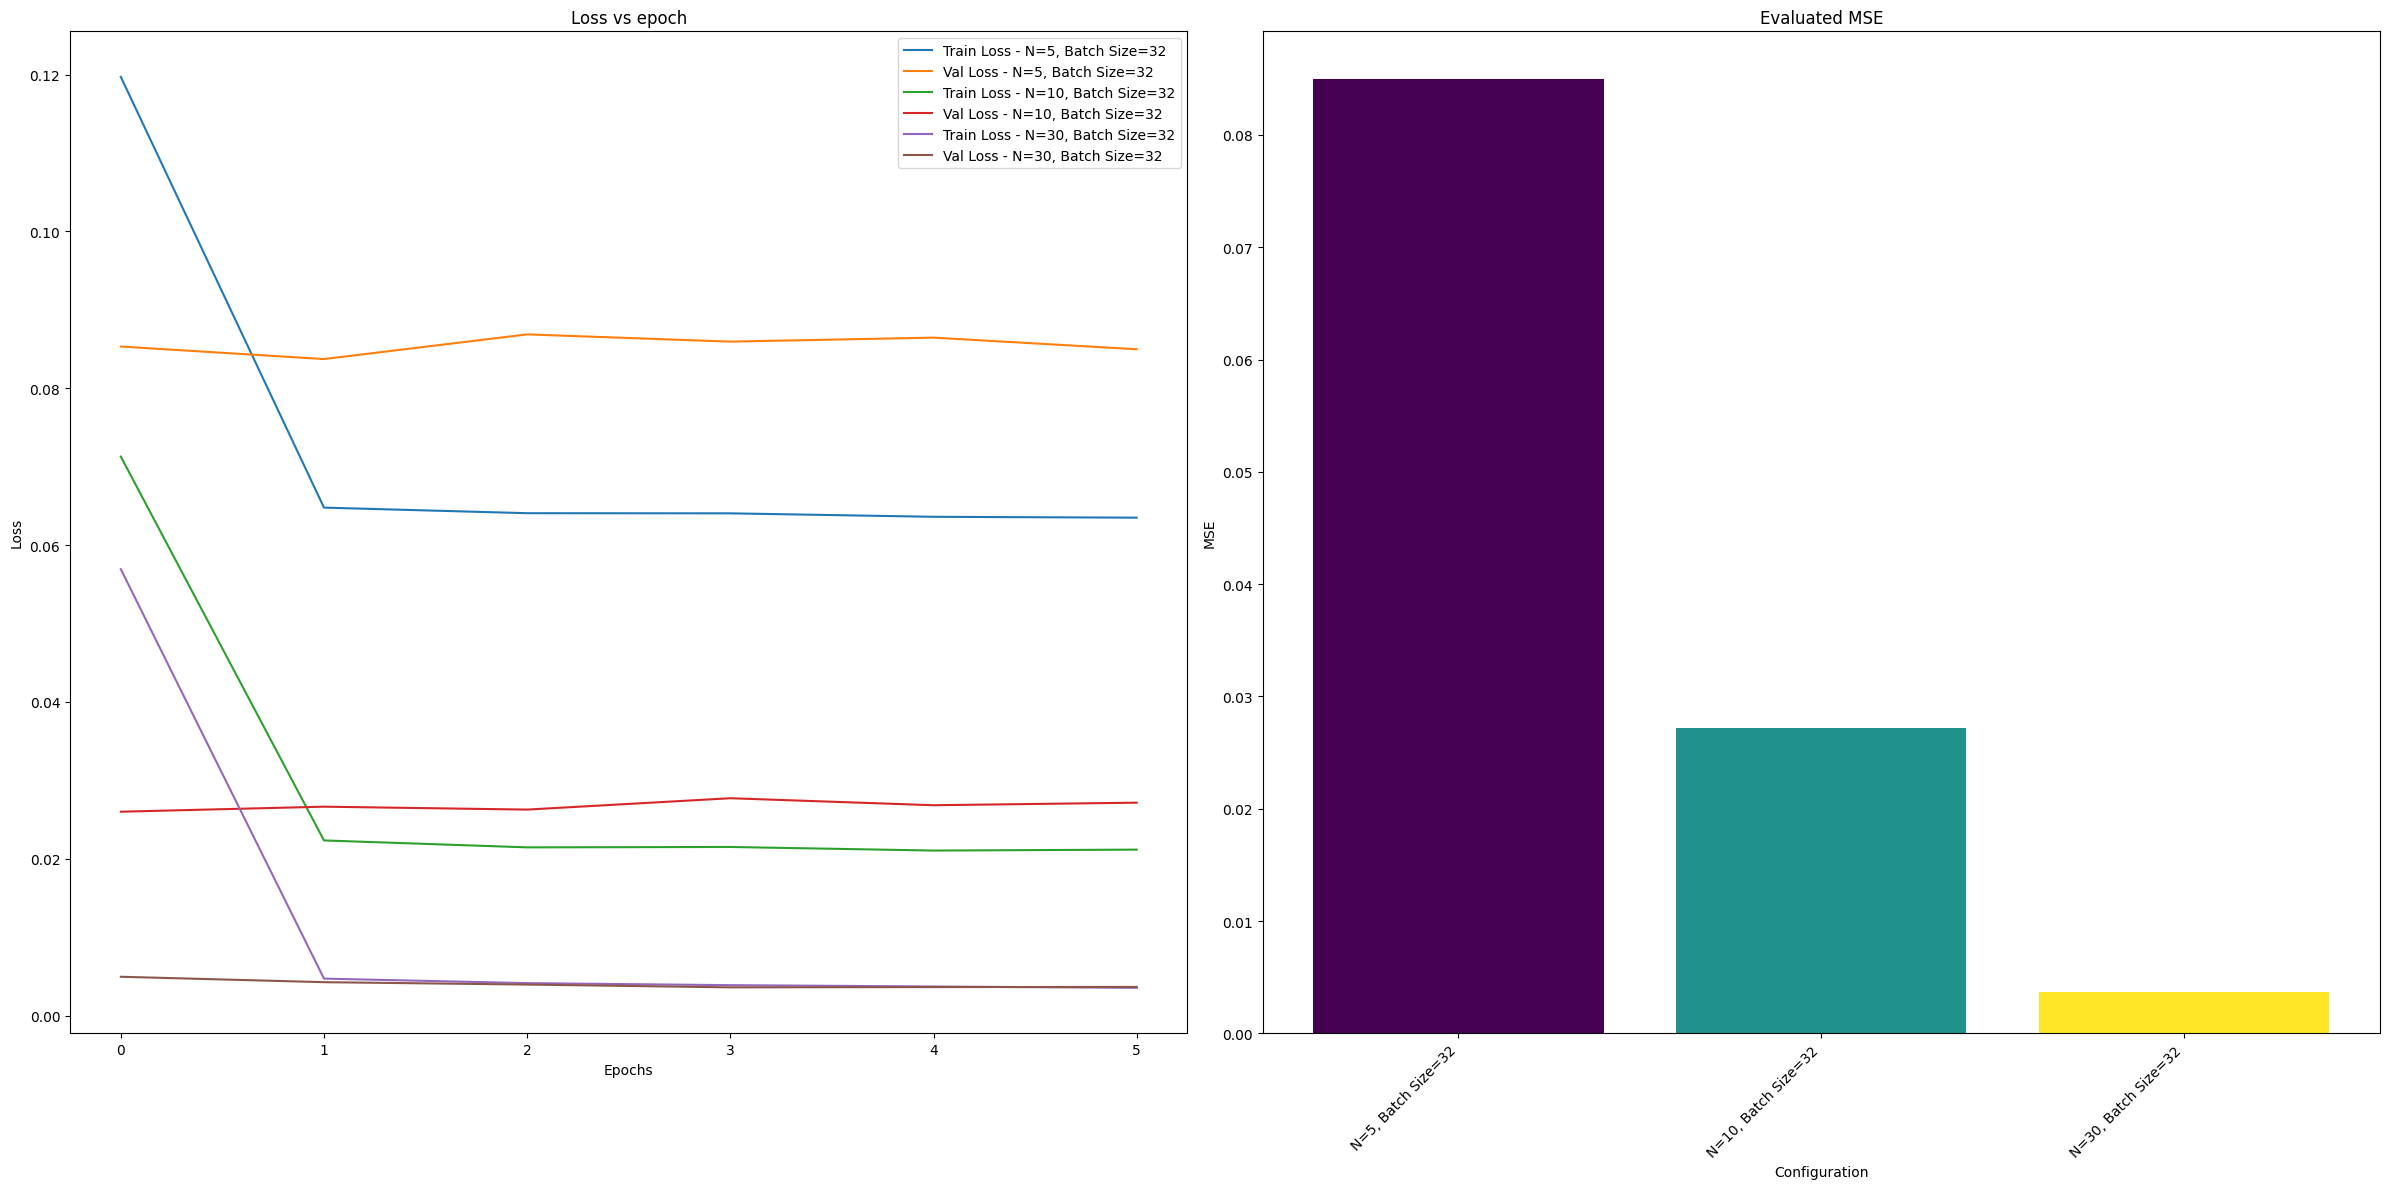

In [ ]:
import mlflow.tensorflow
import itertools
from mlflow.models import infer_signature

def run_experiments(params_dict):
    results = {}
    keys, values = zip(*params_dict.items())
    param_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

    for config in param_combinations:
        print(f"Running experiment with {config}")

        model = NonLinearCompressor(config['N'])
        
        x_train = np.random.standard_normal((config['data_size'], 1)).astype('float32')
        x_val = np.random.standard_normal((config['data_size'] // 10, 1)).astype('float32')  # 10% for validation
        history = model.train(x_train, x_val, config['epochs'], config['batch_size'])

        val_mse = model.evaluate(x_val)
        history['val_mse'] = val_mse

        # Attempting to use MLFlow for logging, cant get it to work currently
            # input_example = x_train[0:1]
            # output_example = model.model(input_example)

            # print(f"type: {type(input_example)} | value: {input_example}")
            # print(f"type: {type(output_example.numpy())} | value: {output_example}")

            # signature = infer_signature(input_example, output_example.numpy())
            
            # mlflow.end_run()
            # # Log model with signature
            # with mlflow.start_run() as run:
            #     mlflow.tensorflow.log_model(model, f"{config}", signature=signature)

        results[(config['N'], config['batch_size'])] = history

    return results



import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def plot_results(results, val=False):
    fig, axes = plt.subplots(1, 2, figsize=(24, 12))

    ax1 = axes[0]
    for key, history in results.items():
        if val:
            label_train = f'Train Loss - N={key[0]}, Batch Size={key[1]}'
            label_val = f'Val Loss - N={key[0]}, Batch Size={key[1]}'

            ax1.plot(history['loss'], label=label_train)
            ax1.plot(history['val_loss'], label=label_val)
        else:
            label_train = f'Train Loss - N={key[0]}, Batch Size={key[1]}'
            ax1.plot(history['loss'], label=label_train)

    ax1.set_title("Loss vs epoch")
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()

    ax2 = axes[1]
    mse_labels_values = [(f"N={key[0]}, Batch Size={key[1]}", history['val_mse']) for key, history in results.items()]
    mse_labels_values.sort(key=lambda x: x[1], reverse=True)  # Sort by MSE values in descending order

    labels, mse_values = zip(*mse_labels_values)
    colors = cm.viridis(np.linspace(0, 1, len(labels)))  # Use a colormap for varying colors

    ax2.bar(range(len(labels)), mse_values, color=colors)  
    ax2.set_title("Evaluated MSE")
    ax2.set_xlabel('Configuration')
    ax2.set_ylabel('MSE')
    ax2.set_xticks(range(len(labels)))
    ax2.set_xticklabels(labels, rotation=45, ha='right')

    plt.tight_layout()
    plt.show()


# Must contain N, batch_size, epochs, data_size 
configurations = {
    "N": [5, 10, 30],
    "batch_size": [32],
    "epochs": [6],
    "data_size": [50000]
    # other parameters to be added later
    # "learning_rate": [0.001],
    # "activation_function": ["relu"]
}



results = run_experiments(configurations)
plot_results(results, True)
